# SPH

### Kernel function

Cubic spline kernel function 

\begin{equation}
W(r,h)=\frac{C}{{{h}^{d}}}\left( \begin{matrix}
   1-\frac{3}{2}{{q}^{2}}+\frac{3}{4}{{q}^{3}} & {} & 0\le q<1  \\
   \frac{1}{4}{{(2-q)}^{3}} & {} & 1\le q<2  \\
   0 & {} & q\ge 2  \\
\end{matrix} \right. 
\end{equation}

Where $q=|r|/h$  ,Where C is a scaling factor which assures the compliance with the kernel function properties and depends on the dimension of the problem (e.g. d=1 for 1D):

\begin{equation}
C=\left( \begin{matrix}
   \frac{2}{3} & d=1  \\
   \frac{10}{7\pi } & d=2  \\
   \frac{1}{\pi } & d=3  \\
\end{matrix} \right.
\end{equation}

The 1-order and 2-order derivative of kernal function can be expressed as follows:

\begin{equation}
{W}'(r,h)=\frac{C}{{{h}^{d+1}}}\left( \begin{matrix}
   -3q+\frac{9}{4}{{q}^{2}} & 0\le q<1  \\
   -\frac{3}{4}{{(2-q)}^{2}} & 1\le q<2  \\
   0 & q\ge 2  \\
\end{matrix} \right.
\end{equation}

\begin{equation}
{W}''(r,h)=\frac{C}{{{h}^{d+2}}}\left( \begin{matrix}
   -3+\frac{9}{2}q & 0\le q<1  \\
   \frac{3}{2}(2-q) & 1\le q<2  \\
   0 & q\ge 2  \\
\end{matrix} \right.
\end{equation}

Intergral approximation of 2-order dispersion derivation:
$$F({{r}_{i}}-{{r}_{j}})=F(r,h)=\frac{1}{|r|}{W}'(r,h)$$


### Piecewise function input

In [45]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

def kernelfun (h, r,d):
    q=abs(r/(h**d))
    if  d  == 1: C=2/3
    elif d == 2: C=10/7/np.pi
    elif d == 3: C=1/np.pi
    if 0 <= q < 1:
        return (1-1.5*q*q+0.75*q*q*q) * C
    elif 1 <= q < 2:
        return (0.25*(2-q)**3) * C
    return 0.0 

kfun = np.vectorize(kernelfun)

def dkernelfun (h, r,d):
    q=abs(r/(h**(d+1)))
    if   d == 1: C=2/3
    elif d == 2: C=10/7/np.pi
    elif d == 3: C=1/np.pi
    if 0 <= q < 1:
        return (-3*q+2.25*q*q) * C
    elif 1 <= q < 2:
        return (-0.75*(2-q)**2) * C
    return 0.0 

dkfun = np.vectorize(dkernelfun)

def ddkernelfun (h, r,d):
    q=abs(r/(h**(d+2)))
    if   d == 1: C=2/3
    elif d == 2: C=10/7/np.pi
    elif d == 3: C=1/np.pi
    if 0 <= q < 1:
        return (-3+4.5*q) * C
    elif 1 <= q < 2:
        return (1.5*(2-q)) * C
    return 0.0 

ddkfun = np.vectorize(ddkernelfun)

def Ffun (h, r,d):
    q=abs(r/(h**(d+1)))
    if   d == 1: C=2/3
    elif d == 2: C=10/7/np.pi
    elif d == 3: C=1/np.pi
    if 0 <= q < 1:
        return (1/abs(r))*(-3*q+2.25*q*q) * C
    elif 1 <= q < 2:
        return (1/abs(r))*(-0.75*(2-q)**2) * C
    return 0.0 

Fkfun = np.vectorize(Ffun)

### Plot the result

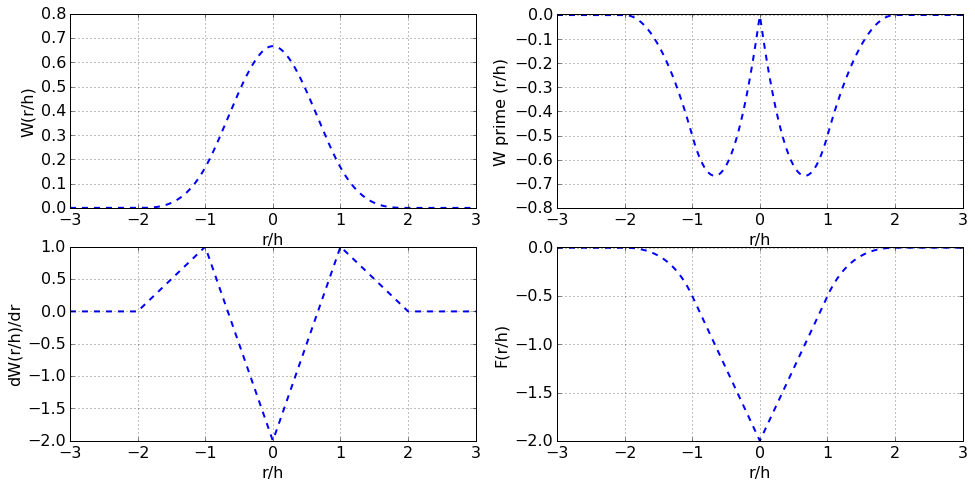

In [97]:
# Four axes, returned as a 2-d array
plt.figure(figsize=(16, 16))

x = np.linspace(-3, 3, 1000)    
y1 = kfun(1, x,1)
y2 = dkfun(1, x,1)
y3 = ddkfun(1, x,1)
y4 = Fkfun(1, x,1)

plt.subplot(4, 2, 1)
plt.plot(x, y1, '--',lw=2)
plt.xlim(-3, 3)
plt.ylim(0, 0.8)
plt.grid(True)
plt.xlabel('r/h', fontsize=16)
plt.ylabel('W(r/h)', fontsize=16)
plt.tick_params(labelsize=16)


plt.subplot(4, 2, 2)
plt.plot(x, y2, '--',lw=2)
plt.xlim(-3, 3)
plt.ylim(-0.8, 0.005)
plt.grid(True)
plt.xlabel('r/h', fontsize=16)
plt.ylabel('W prime (r/h)', fontsize=16)
plt.tick_params(labelsize=16)


plt.subplot(4, 2, 3)
plt.plot(x, y3, '--',lw=2)
plt.xlim(-3, 3)
plt.ylim(-2, 1)
plt.grid(True)
plt.xlabel('r/h', fontsize=16)
plt.ylabel('dW(r/h)/dr', fontsize=16)
plt.tick_params(labelsize=16)


plt.subplot(4, 2, 4)
plt.plot(x, y4, '--',lw=2)
plt.xlim(-3, 3)
plt.ylim(-2, 0.01)
plt.grid(True)
plt.xlabel('r/h', fontsize=16)
plt.ylabel('F(r/h)', fontsize=16)
plt.tick_params(labelsize=16)

plt.show()

Results in Paulo's paper
<img src="./resources/kernelfunction.png" width="800">